In [35]:
import os
import glob
import re

import numpy as np

from sentence_transformers import SentenceTransformer, InputExample, losses
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.data import DataLoader

def load_txt_files(directory):
    file_contents = []
    for file_path in glob.glob(os.path.join(directory, '*.txt')):
        with open(file_path, 'r', encoding='utf-8') as file:
            file_contents.append(file.read())
    return file_contents

directory = 'data/train/' 
texts = load_txt_files(directory)


In [22]:
def split_into_chunks(text, mean_length, std_dev):
    
    chunk_lengths = np.random.normal(mean_length, std_dev, size=(len(text) // int(mean_length) + 1)).astype(int)
    
    chunks = []
    start = 0
    for length in chunk_lengths:

        end = start + length
        sentence_end = text.find('.', end)
        if sentence_end != -1:

            end = sentence_end + 1
        end = min(end, len(text))
        
        chunks.append(text[start:end].strip())
        start = end

        if start >= len(text):
            break

    return chunks

mean_length = 925.73
std_deviation = 50.40
text_chunks = [chunk for text in texts for chunk in split_into_chunks(text, mean_length, std_deviation)]


In [23]:
text_chunks[:3]

["Harry Potter and The Half-Blood Prince\n\nChapter 1: The Other Minister\n\nIt was nearing midnight and the Prime Minister was sitting alone in his office, reading a long memo that was slipping through his brain without leaving the slightest trace of meaning behind. He was waiting for a call from the President of a far distant country, and between wondering when the wretched man would telephone, and trying to suppress unpleasant memories of what had been a very long, tiring, and difficult week, there was not much space in his head for anything else. The more he attempted to focus on the print on the page before him, the more clearly the Prime Minister could see the gloating face of one of his political opponents. This particular opponent had appeared on the news that very day, not only to enumerate all the terrible things that had happened in the last week (as though anyone needed reminding) but also to explain why each and every one of them was the government's fault.",
 'The Prime M

In [36]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2') 
embeddings = model.encode(text_chunks)

In [37]:
cos_sim_matrix = cosine_similarity(embeddings)

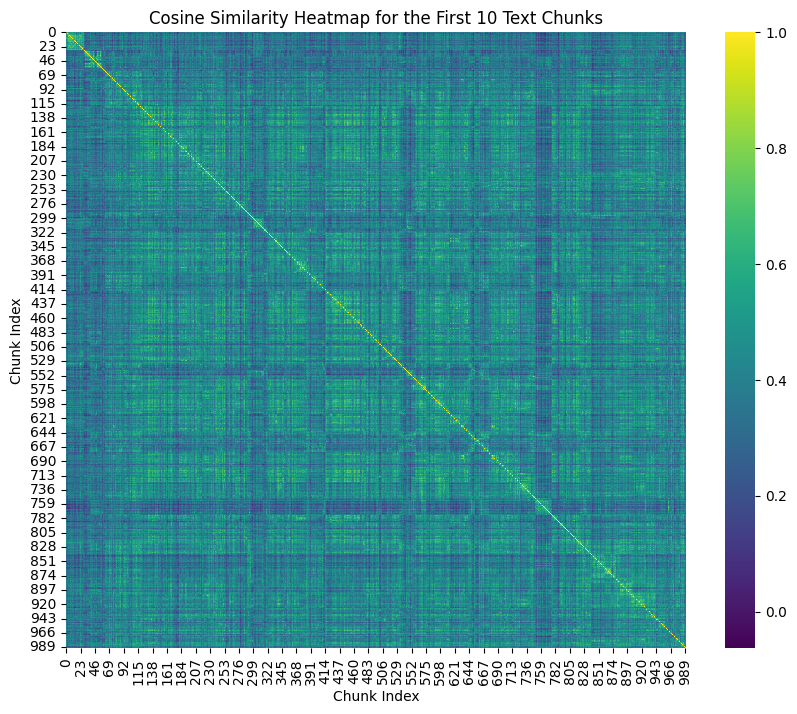

In [41]:
sampled_embeddings = embeddings[:100]

sampled_cos_sim_matrix = cosine_similarity(sampled_embeddings)
plt.figure(figsize=(10, 8))
sns.heatmap(sampled_cos_sim_matrix, annot=False, cmap='viridis')
plt.title('Cosine Similarity Heatmap for the First 10 Text Chunks')
plt.xlabel('Chunk Index')
plt.ylabel('Chunk Index')
plt.show()


In [32]:
chunk_pairs = [(text_chunks[i], text_chunks[i + 1]) for i in range(len(text_chunks) - 1)]

split_index = int(0.8 * len(chunk_pairs))
train_pairs = chunk_pairs[:split_index]
val_pairs = chunk_pairs[split_index:]

train_examples = [InputExample(texts=[pair[0], pair[1]]) for pair in train_pairs]
val_examples = [InputExample(texts=[pair[0], pair[1]]) for pair in val_pairs]

In [33]:
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
val_dataloader = DataLoader(val_examples, shuffle=True, batch_size=16)

In [42]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2') 

train_loss = losses.MegaBatchMarginLoss(model=model)

model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1)

TypeError: SentenceTransformer.fit() got an unexpected keyword argument 'val_dataloader'

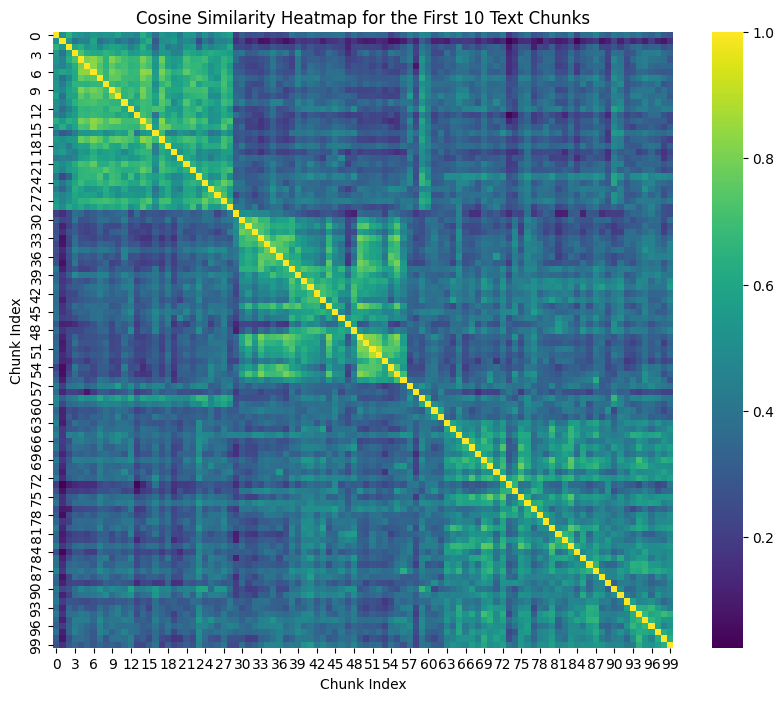

: 

In [43]:
embeddings = model.encode(text_chunks)
cos_sim_matrix = cosine_similarity(embeddings)
sampled_embeddings = embeddings[:100]

sampled_cos_sim_matrix = cosine_similarity(sampled_embeddings)
plt.figure(figsize=(10, 8))
sns.heatmap(sampled_cos_sim_matrix, annot=False, cmap='viridis')
plt.title('Cosine Similarity Heatmap for the First 10 Text Chunks')
plt.xlabel('Chunk Index')
plt.ylabel('Chunk Index')
plt.show()
